In [1]:
import numpy as np
import matplotlib.pyplot as plt
import general_coeff_funcs as gcf
from shapes import DBI

First, let's load in some coefficients we calculated earlier, describing the shape function derived from a DBI model. To use the coefficients we also need to know what $k_{min}$ and $k_{max}$ they were calculated for.

In [2]:
k_min, k_max, cs_dbi = gcf.load_coeffs('dbi_example/res_coeffs_dbi_l30.csv')

These coefficients are with respect to the log basis, of size 30.

In [3]:
Pmax = 30
basis_funcs = gcf.set_up_log_basis(k_min, k_max, Pmax, inv=True, verbose=True)

# inv: True
# Ortho check: 30 = 29.99999999996103


Let's take a look at what this shape function looks like.

min, max =,-4.695026889415029e-13,6.965803354347518e-14
Color map limits:,-2.4914895905457354e-13,-1.9661211065127058e-15
(0.001 and 0.999 quantile limits.)


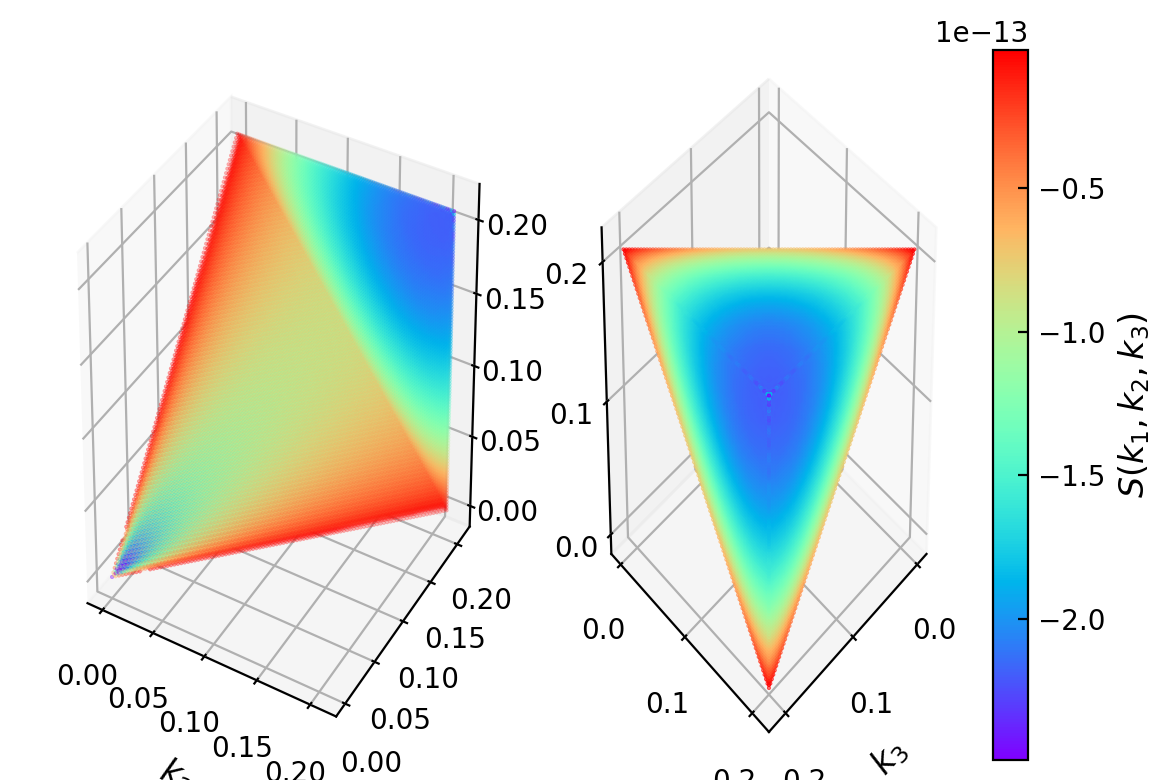

In [4]:
gcf.print_and_plot_tetra(k_min, k_max, cs_dbi, basis_funcs, 'temp.csv', Nk=100, title='', override_colour=None)

If you're wondering why the colour along the center-line of the side-faces isn't uniform, it's because we are
limited to the cube $[k_{min},k_{max}]$, so at the bottom corner $(k_{min},k_{min},k_{min})$ there is no squeezed limit,
only the equilateral limit.

Getting the 3d view is great, but in practice it can be more useful to take individual lines through the tetrapyd.
Below we plot the flattened limit ($k_3/k_2=2$), equilateral limit ($k_3/k_2=1$) and two lines in the squeezed limit.
Now we can clearly see the scaling of the shape function, relative to its amplitude. We can also see the slow-roll
suppressed becoming dominant in the deep squeezed limit, meaning that the shape doesn't go to zero in that limit
(it can't, as it needs to match with the consistency condition).

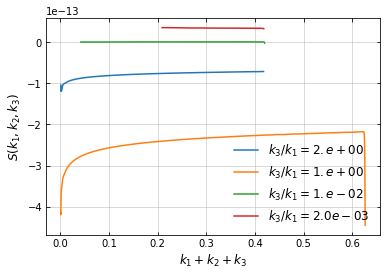

In [5]:
gcf.various_lines_plot(k_min, k_max, cs_dbi, basis_funcs, title='')

There may be some inaccuracies at the corners; the 3d plot can be used to get an understanding
of the affected volume, and the fractional_difference calls below can quantify whether the
effect matters or not.

Below we will check our coefficients against the DBI template, with and without scaling.

In [6]:
template = lambda x, y, z: DBI(x, y, z, scaling='no')
no_scale_diff = gcf.fractional_difference(k_min, k_max, template, cs_dbi, basis_funcs, Nk=200)
print('No scaling', round(no_scale_diff,4))

No scaling 0.0443


In [8]:
template = lambda x, y, z: DBI(x, y, z, scaling='prod')
prod_scale_diff = gcf.fractional_difference(k_min, k_max, template, cs_dbi, basis_funcs, Nk=200)
print('With scaling', round(prod_scale_diff,4))

Prod scaling 0.0067


The template with no scaling has a fractional error of a few percent, but by including
the scaling we can get that below percent-level. 

How well has the expansion converged? If you want to plot the full graph this can be a bit
slow, comparing to the set whose size is 5 smaller can be used as a proxy.

In [ ]:
results = []
#for i in [30, 29, 28, 25, 20, 15, 5]:
for i in range(Pmax,3,-1):
    basis_funcs_reduced = gcf.set_up_log_basis(k_min, k_max, i, inv=True, verbose=False)
    cs_reduced = gcf.convert_between_bases(basis_funcs, basis_funcs_reduced, k_min, k_max, cs_dbi, Nk=600)
    cube_diff = gcf.err_between_coeffs(k_min, k_max, cs_dbi, basis_funcs, cs_reduced, basis_funcs_reduced, Ncorr=400, cube=True)
    tetr_diff = gcf.err_between_coeffs(k_min, k_max, cs_dbi, basis_funcs, cs_reduced, basis_funcs_reduced, Ncorr=400, cube=False)
    results.append([i, cube_diff, tetr_diff])
    #print(*results[-1], flush=True)
results = np.array(results).T

30 4.507878186884101e-13 1.4234265779088053e-11
29 2.7071718461086196e-05 0.004416951304634964
28 8.497341382742038e-05 0.008926705770279406
27 0.00011692993185711513 0.004532077753506257
26 0.0001201345895128746 0.00025038846998275734
25 0.00012015216085501291 0.0003412474014536884
24 0.00012019435909198581 0.0005049918539631688
23 0.0001202449264766346 0.0005207824193772652
22 0.00012028534899844771 0.0005865449851400342
21 0.00012040031968689488 0.0008235366318768689
20 0.00012064874867550487 0.0009281334478053176
19 0.00012086808407492219 0.0008923249475250934


In [ ]:
plt.plot(results[0], results[1], '-x', label='FracDiff on cube')
plt.plot(results[0], results[2], '-x', label='FracDiff on tetrapyd')
plt.yscale('log')
plt.legend()
plt.show()